In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/colab notebooks/justice.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3303 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


In [ ]:
df.describe()

,Unnamed: 0,ID,facts_len,majority_vote,minority_vote
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,1651.000000,56336.505298,1112.496821,7.009688,1.727823
std,953.638296,3600.259018,531.514960,1.726244,1.604460
min,0.000000,50606.000000,26.000000,0.000000,0.000000
25%,825.500000,54339.500000,757.000000,5.000000,0.000000
50%,1651.000000,55260.000000,1049.000000,7.000000,2.000000
75%,2476.500000,59437.500000,1381.000000,9.000000,3.000000
max,3302.000000,63335.000000,6201.000000,9.000000,4.000000


In [ ]:
#check with null values
df.isnull().sum()

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [ ]:
#Drop Unwanted columns
df.drop(columns=['name','href','docket','term'],inplace=True)

In [ ]:
# Handling null values
df['first_party_winner'].fillna(df['first_party_winner'].mean(),inplace=True)
df['disposition'].fillna("Yes",inplace=True)
df['decision_type'].fillna("Yes",inplace=True)
df['issue_area'].fillna("Yes",inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
ID                    0
first_party           1
second_party          1
facts                 0
facts_len             0
majority_vote         0
minority_vote         0
first_party_winner    0
decision_type         0
disposition           0
issue_area            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   first_party         3302 non-null   object
 3   second_party        3302 non-null   object
 4   facts               3303 non-null   object
 5   facts_len           3303 non-null   int64 
 6   majority_vote       3303 non-null   int64 
 7   minority_vote       3303 non-null   int64 
 8   first_party_winner  3303 non-null   object
 9   decision_type       3303 non-null   object
 10  disposition         3303 non-null   object
 11  issue_area          3303 non-null   object
dtypes: int64(5), object(7)
memory usage: 309.8+ KB


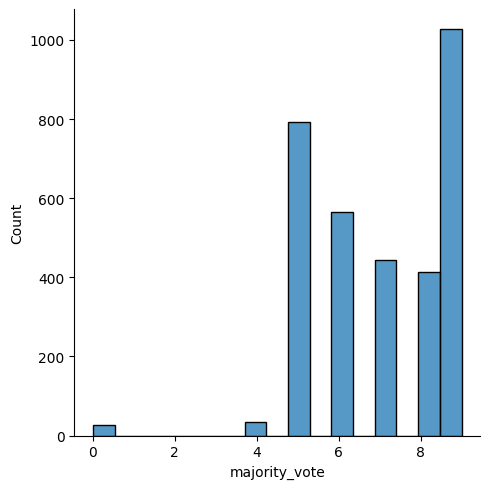

In [ ]:
#Making Univariat Analysis
sns.displot(df['majority_vote'])

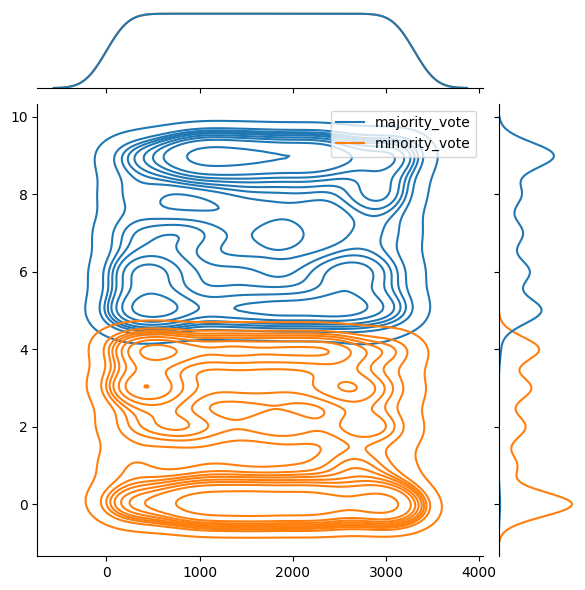

In [ ]:
#Making Bivariat analysis
sns.jointplot([df['majority_vote'],df['minority_vote']],kind='kde')

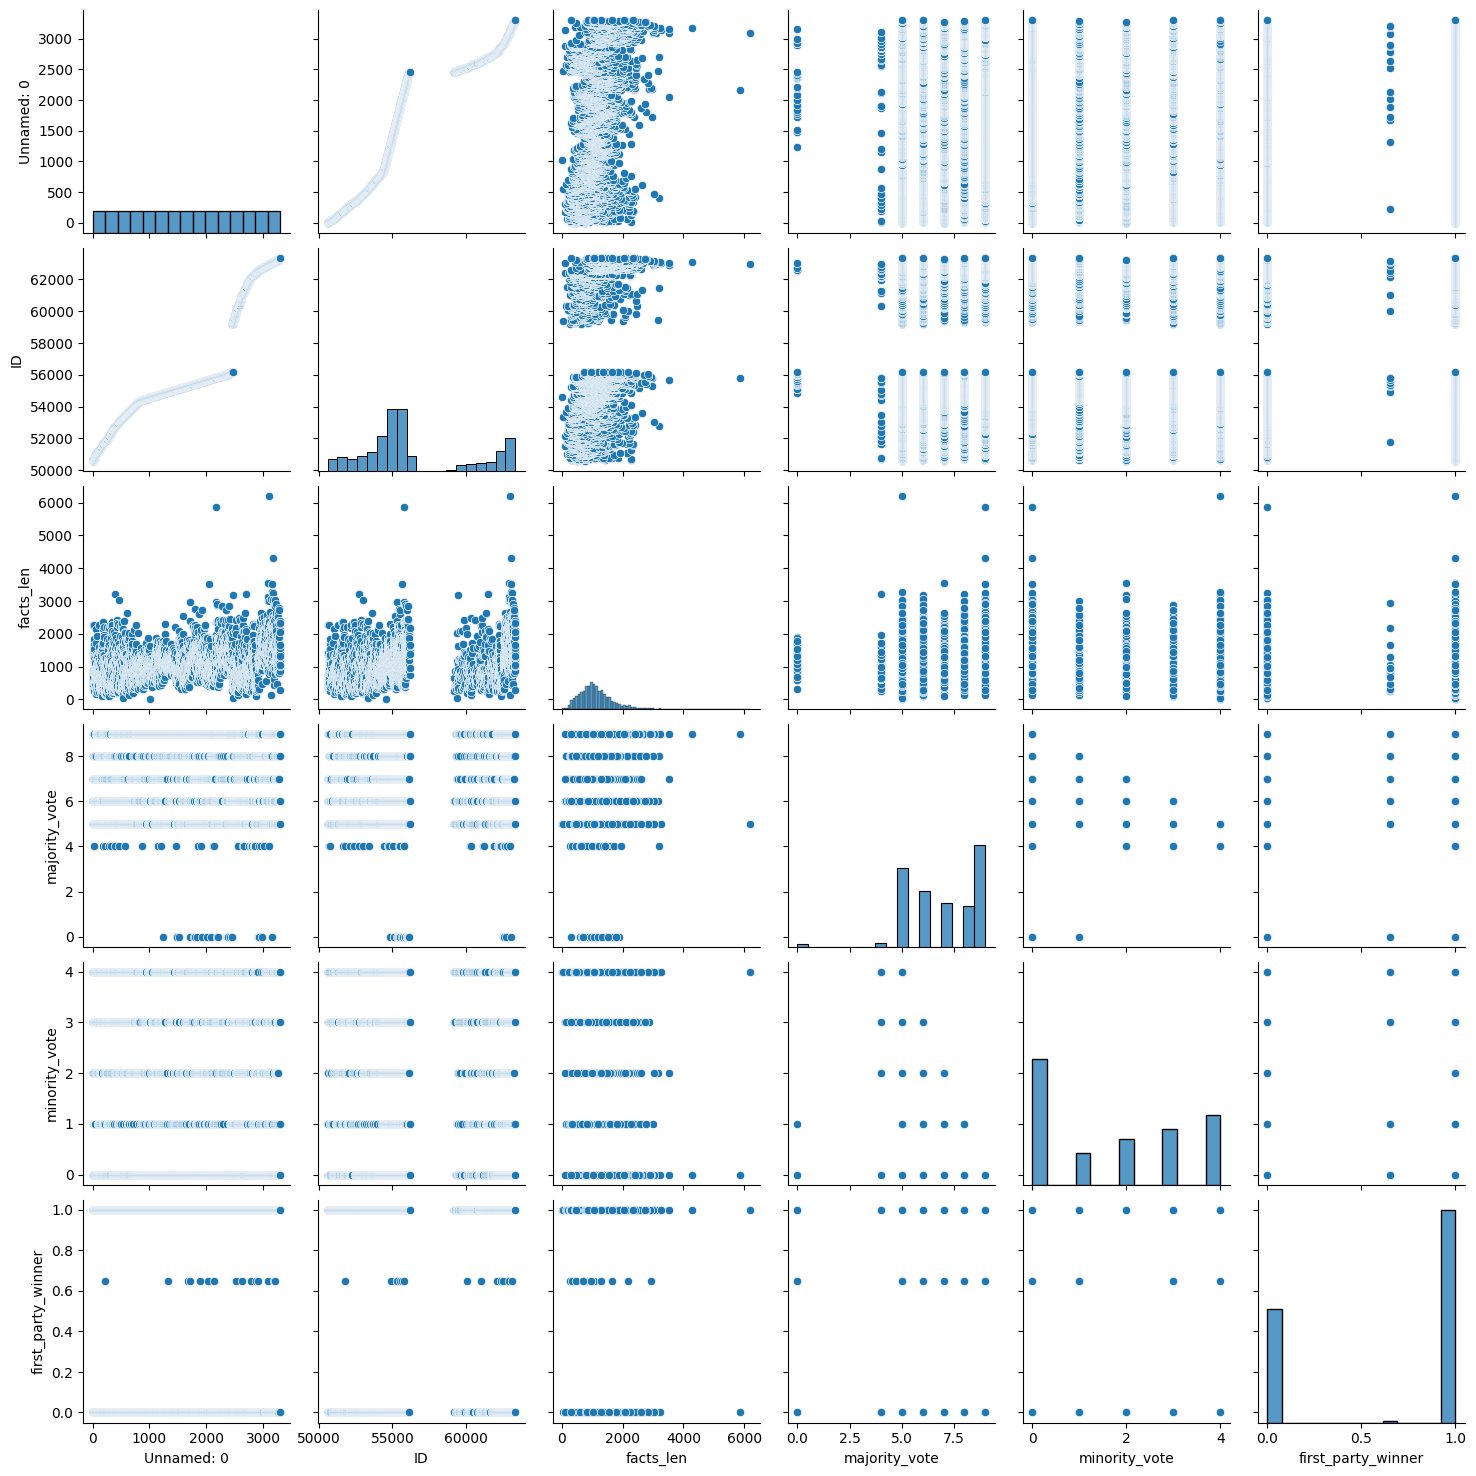

In [ ]:
#Making Multivariat Analysis
sns.pairplot(df)

In [ ]:
le=LabelEncoder()

In [ ]:
#Encoding
df['first_party'] = le.fit_transform(df['first_party'])
df['second_party'] = le.fit_transform(df['second_party'])
df['decision_type'] = le.fit_transform(df['decision_type'])
df['issue_area'] = le.fit_transform(df['issue_area'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   first_party         3303 non-null   int64 
 3   second_party        3303 non-null   int64 
 4   facts               3303 non-null   object
 5   facts_len           3303 non-null   int64 
 6   majority_vote       3303 non-null   int64 
 7   minority_vote       3303 non-null   int64 
 8   first_party_winner  3303 non-null   object
 9   decision_type       3303 non-null   int64 
 10  disposition         3303 non-null   object
 11  issue_area          3303 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 309.8+ KB


In [ ]:
df.head()

,Unnamed: 0,ID,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,1278,989,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,6,reversed,14
1,1,50613,2029,1046,<p>Joan Stanley had three children with Peter ...,757,5,2,True,6,reversed/remanded,1
2,2,50623,1359,2343,<p>John Giglio was convicted of passing forged...,495,7,0,True,6,reversed/remanded,3
3,3,50632,2272,357,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,6,reversed/remanded,1
4,4,50643,1677,325,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,6,vacated/remanded,7


In [ ]:
#Splitting independent and dependent variables
x=df.drop('decision_type',axis=1)
y=df['decision_type']

In [ ]:
x.head()

,Unnamed: 0,ID,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,disposition,issue_area
0,0,50606,1278,989,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,reversed,14
1,1,50613,2029,1046,<p>Joan Stanley had three children with Peter ...,757,5,2,True,reversed/remanded,1
2,2,50623,1359,2343,<p>John Giglio was convicted of passing forged...,495,7,0,True,reversed/remanded,3
3,3,50632,2272,357,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,reversed/remanded,1
4,4,50643,1677,325,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,vacated/remanded,7


In [ ]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: decision_type, dtype: int64

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the categorical features
categorical_columns = x.select_dtypes(include=['object']).columns
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(x[categorical_columns]))

feature_names = []
for i, column in enumerate(categorical_columns):
    unique_values = df[column].unique()
    for value in unique_values:
        feature_names.append(f"{column}_{value}")

# Create a DataFrame from the encoded features with the proper column names
X_encoded = pd.DataFrame(X_encoded, columns=feature_names)


# Concatenate the encoded features with the remaining numerical features
X_encoded = pd.concat([x.drop(categorical_columns, axis=1).reset_index(drop=True), X_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#Splitting of training and testing data
x_train,x_test,y_train,y_test=train_test_split(X_encoded,y_encoded,train_size=0.8,random_state=45)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Create individual Random Forest models with different hyperparameters
model1 = RandomForestClassifier(n_estimators=100, max_depth=10)
model2 = RandomForestClassifier(n_estimators=200, max_depth=5)
model3 = RandomForestClassifier(n_estimators=50, max_depth=15)

# Create the VotingClassifier with the individual models
ensemble_model = VotingClassifier(
    estimators=[('rf1', model1), ('rf2', model2), ('rf3', model3)],
    voting='hard'  # Use majority voting
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train_imputed, y_train)

VotingClassifier(estimators=[('rf1', RandomForestClassifier(max_depth=10)),
                             ('rf2',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=200)),
                             ('rf3',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=50))])

In [ ]:
#Testing of data
y_pred = ensemble_model.predict(X_test_imputed)

In [ ]:
y_pred

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 2, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6,

In [ ]:
#validating model using evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.20      0.50      0.29         2
           5       1.00      1.00      1.00         4
           6       0.89      1.00      0.94       576
           8       0.00      0.00      0.00         1
           9       1.00      0.03      0.05        39
          10       0.00      0.00      0.00        33

    accuracy                           0.88       661
   macro avg       0.45      0.32      0.31       661
weighted avg       0.84      0.88      0.83       661



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   0,   1,   0,   0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 576,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   2,   0,  36,   0,   1,   0],
       [  0,   0,   0,   0,   0,  33,   0,   0,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8819969742813918


In [ ]:
#best model is saved in pickel format for web integration
import pickle
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_imputed, y_train)

# Save the best model using pickle
filename = 'random_forest_model.pkl'
pickle.dump(random_search, open(filename, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
